### Step 0: Import Libraries

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 1: Data Input (1 mark)

The data used for this task can be downloaded using the yellowbrick library:
https://www.scikit-yb.org/en/latest/api/datasets/spam.html

Use the yellowbrick function `load_spam()` to load the spam dataset into the feature matrix `X` and target vector `y`.

Print the size and type of `X` and `y`.

In [185]:
# TO DO: Import spam dataset from yellowbrick library (0.5 marks)

from yellowbrick.datasets import load_spam

# Load the spam dataset
(X,y) = load_spam()

# TO DO: Print size and type of X and y (0.5 marks)
print("Type of X:", type(X))
print("Size of X:", X.shape)
print("Type of y:", type(y))
print("Size of y:", y.shape)

Type of X: <class 'pandas.core.frame.DataFrame'>
Size of X: (4600, 57)
Type of y: <class 'pandas.core.series.Series'>
Size of y: (4600,)


### Step 2: Data Processing (2 marks)

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values.

In [186]:
# TO DO: Check if there are any missing values and fill them in if necessary (1 mark)
print(X.isnull().values.any())
print(y.isnull().values.any())

False
False


For this task, we want to test if the linear model would still work if we used less data. Use the `train_test_split` function from sklearn to create a new feature matrix named `X_small` and a new target vector named `y_small` that contain **3%** of the data.

In [187]:
from sklearn.model_selection import train_test_split
# TO DO: Create X_small and y_small (1 mark)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.03, random_state=0)
X_small=X_train
y_small=y_train

### Step 3: Implement Machine Learning Model

1. Import `LogisticRegression` from sklearn
2. Instantiate model `LogisticRegression(max_iter=2000)`
3. Implement the machine learning model with three different datasets:
    - `X` and `y`
    - Only first two columns of `X` and `y`
    - `X_small` and `y_small`

### Step 4: Validate Model

Calculate the training and validation accuracy for the three different tests implemented in Step 3

### Step 5.1: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Data size, training accuracy, validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [188]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(max_iter=2000).fit(X1_train, y1_train)
print("Training set score: {:.3f}".format(logreg.score(X1_train, y1_train)))
print("Validation set score: {:.3f}".format(logreg.score(X1_test, y1_test)))


X2_train, X2_test, y2_train, y2_test = train_test_split(X.iloc[:, 0:2], y, test_size=0.3, random_state=0)
logreg_2 = LogisticRegression(max_iter=2000).fit(X2_train, y2_train)
print("Training set score: {:.3f}".format(logreg_2.score(X2_train, y2_train)))
print("Validation set score: {:.3f}".format(logreg_2.score(X2_test, y2_test)))


X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.03, random_state=0)
X_small=X_train
y_small=y_train
logreg_3 = LogisticRegression(max_iter=2000).fit(X_small, y_small)
print("Training set score: {:.3f}".format(logreg_3.score(X_small, y_small)))
print("Validation set score: {:.3f}".format(logreg_3.score(X_test, y_test)))



# Create an empty DataFrame to store results
results = pd.DataFrame(columns=['Data size', 'Training accuracy', 'Validation accuracy'])
# model1 Accuracy
m1_training_accuracy = logreg.score(X1_train, y1_train)
m1_validation_accuracy = logreg.score(X1_test, y1_test)

# model2 Accuracy
m2_training_accuracy = logreg_2.score(X2_train, y2_train)
m2_validation_accuracy = logreg_2.score(X2_test, y2_test)

# model3 Accuracy
m3_training_accuracy = logreg_3.score(X_small, y_small)
m3_validation_accuracy = logreg_3.score(X_test, y_test)
d = {'Data size': [X.size, X.iloc[:, 0:2].size, X_small.size], 'training accuracy': [m1_training_accuracy, m2_training_accuracy, m3_training_accuracy], 'validation accuracy': [m1_validation_accuracy, m2_validation_accuracy, m3_validation_accuracy]}
results = pd.DataFrame(data=d)




Training set score: 0.928
Validation set score: 0.935
Training set score: 0.611
Validation set score: 0.607
Training set score: 0.933
Validation set score: 0.928


### Step 5.2: Visualize Classification Errors (3 marks)

In this section, print the confusion matrix and the classification report to investigate the number of false positives vs. false negatives. Use the full dataset for this analysis

In [189]:
# TO DO: Retrieve target vector and predicted values for validation set using full dataset
y1_predict = logreg.predict(X1_test)
y2_predict = logreg_2.predict(X2_test)
y3_predict = logreg_3.predict(X_test)

Text(70.72222222222221, 0.5, 'True Value')

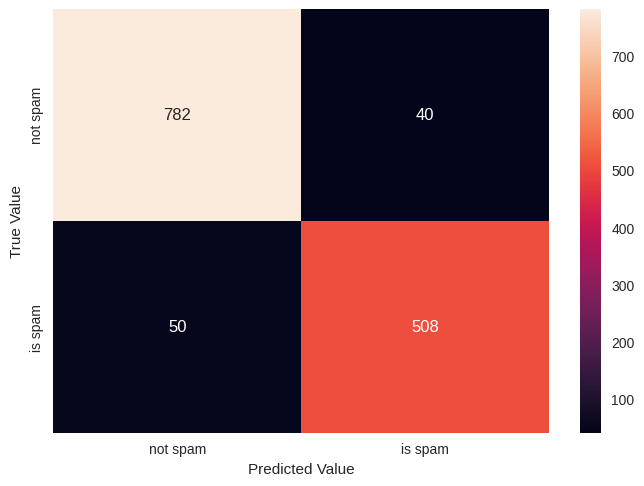

In [190]:
# TO DO: Print confusion matrix using a heatmap
# HINT: To remove scientific notation from a heatmap, set the parameter fmt='d'
from sklearn.metrics import confusion_matrix
# Calculate confusion matrix1
cm1 = confusion_matrix(y1_test, y1_predict)
sns.heatmap(cm1, annot=True, fmt='d', xticklabels=['not spam', 'is spam'], yticklabels=['not spam', 'is spam'])
plt.xlabel('Predicted Value')
plt.ylabel('True Value')




Text(70.72222222222221, 0.5, 'True Value')

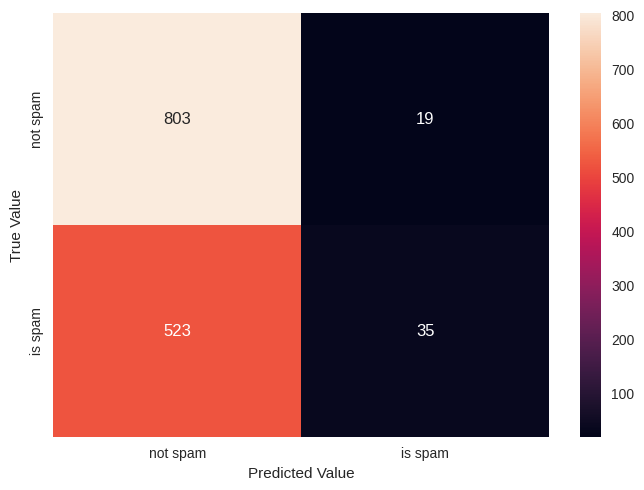

In [191]:
cm2 = confusion_matrix(y2_test, y2_predict)
sns.heatmap(cm2, annot=True, fmt='d', xticklabels=['not spam', 'is spam'], yticklabels=['not spam', 'is spam'])
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

Text(70.72222222222221, 0.5, 'True Value')

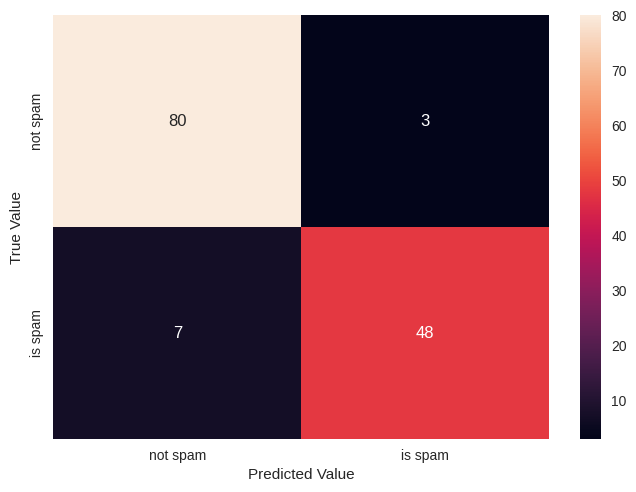

In [192]:
cm3 = confusion_matrix(y_test, y3_predict)
sns.heatmap(cm3, annot=True, fmt='d', xticklabels=['not spam', 'is spam'], yticklabels=['not spam', 'is spam'])
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

In [193]:
# TO DO: Print classification report
from sklearn.metrics import classification_report

print(classification_report(y1_test, y1_predict))
print(classification_report(y2_test, y2_predict))
print(classification_report(y_test, y3_predict))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       822
           1       0.93      0.91      0.92       558

    accuracy                           0.93      1380
   macro avg       0.93      0.93      0.93      1380
weighted avg       0.93      0.93      0.93      1380

              precision    recall  f1-score   support

           0       0.61      0.98      0.75       822
           1       0.65      0.06      0.11       558

    accuracy                           0.61      1380
   macro avg       0.63      0.52      0.43      1380
weighted avg       0.62      0.61      0.49      1380

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        83
           1       0.94      0.87      0.91        55

    accuracy                           0.93       138
   macro avg       0.93      0.92      0.92       138
weighted avg       0.93      0.93      0.93       138



### Questions (6 marks)
1. How do the training and validation accuracy change depending on the amount of data used? Explain with values.
1. In this case, what do a false positive and a false negative represent? Which one is worse?
1. Based on your answer to question 2, would you want to maximize precision or recall? How would you do this?

*ANSWER HERE*
1.If the training data is smaller, the training score should increase and the validation score should decrease. In contrast, if the training data increases, the validation score goes up in comparison.

2.Emails that are spam but were wrongly classified as such are called false negatives in the dataset's definition, while emails that are non-spam but are classified as spam are called false positives. False negatives are more problematic because important emails could be wrongly marked as spam and ignored as a result.

3.We would want to maximize accuracy in order to decrease false negatives since accuracy is the ratio of true positives to the sum of true positives and false positive predictions generated by the model. It can be done by decreasing the false negative values, which will eventually increase the recall value.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?




*DESCRIBE YOUR PROCESS HERE - BE SPECIFIC*

I mostly source my code from the examples that our proffessor provided and also searched in google for relative context.For further confusions I took chat gpt to check if i am going in the correct deriction for my answer.As for the steps I did in order as the questions appear.While using generative AI specially chat gpt it was sometimes confusing .For example I put a wrong varible in one case and when I try to test it with chatgpt it said my problem was that I was trying classifiaction with continous values intead I can try regression!

## Part 2: Regression (15 marks)

For this section, we will be evaluating concrete compressive strength of different concrete samples, based on age and ingredients. You will need to repeat the steps from Part 1 for this analysis.

### Step 1: Data Input (1 mark)

The data used for this task can be downloaded using the yellowbrick library:
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the spam dataset into the feature matrix `X` and target vector `y`.

Print the size and type of `X` and `y`.

In [194]:
# TO DO: Import concrete dataset from yellowbrick library (0.5 marks)

# TO DO: Print size and type of X and y (0.5 marks)
from yellowbrick.datasets import load_concrete
(X, y) = load_concrete()

# TO DO: Print size and type of X and y (0.5 marks)
print("Type of X:", type(X))
print("Size of X:", X.shape)
print("Type of y:", type(y))
print("Size of y:", y.shape)

Type of X: <class 'pandas.core.frame.DataFrame'>
Size of X: (1030, 8)
Type of y: <class 'pandas.core.series.Series'>
Size of y: (1030,)


### Step 2: Data Processing (1 mark)

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values.

In [195]:
# TO DO: Check if there are any missing values and fill them in if necessary
print(X.isnull().values.any())
print(y.isnull().values.any())

False
False


### Step 3: Implement Machine Learning Model (2 marks)

1. Import `LinearRegression` from sklearn
2. Instantiate model `LinearRegression()`
3. Implement the machine learning model with `X` and `y`

In [196]:
# TO DO: ADD YOUR CODE HERE
# Note: for any random state parameters, you can use random_state = 0
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Step 4: Validate Model (2 marks)

Calculate the training and validation accuracy using mean squared error and R2 score.

In [197]:
# TO DO: ADD YOUR CODE HERE
from sklearn.metrics import r2_score, mean_squared_error

y_train_predict = model.predict(X_train)
mean_squared_error_train = mean_squared_error(y_train, y_train_predict)
r2_score_train = r2_score(y_train, y_train_predict)

y_val_predict = model.predict(X_val)
mean_squared_error_val = mean_squared_error(y_val, y_val_predict)
r2_score_val = r2_score(y_val, y_val_predict)

print("Training mean squared error: {:.2f}".format(mean_squared_error_train))
print("Validation mean squared error: {:.2f}".format(mean_squared_error_val))

print("Training R2 square score: {:.2f}".format(r2_score_train))
print("Validation R2 square score: {:.2f}".format(r2_score_val))

Training mean squared error: 113.41
Validation mean squared error: 93.62
Training R2 square score: 0.61
Validation R2 square score: 0.64


### Step 5: Visualize Results (1 mark)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: MSE and R2 score
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [198]:
# TO DO: ADD YOUR CODE HERE
data = { 'Training accuracy': [mean_squared_error_train, r2_score_train], 'Validation accuracy': [mean_squared_error_val, r2_score_val]}
index=["MSE", "R2"]
results = pd.DataFrame(data=data, index=index)
print(results)

     Training accuracy  Validation accuracy
MSE         113.410826            93.624364
R2            0.606594             0.635277


### Questions (4 marks)
1. Did using a linear model produce good results for this dataset? Why or why not?



1. Could we tell if this model was a good fit by using just the mean squared error? Why or why not?

   
1.As we are trying to find a continuous value based on our features, I think a linear model is the best way to get good results.

2.Looking at only mean squared error might not be helpful; the R-squared value mainly describes whether it was a good fit or not.Other validation matics like absolute mean square could also be helpful.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE - BE SPECIFIC*


I mostly sourced my code from the examples that our professor provided and also searched on Google for relevant context. For further clarification, I consulted ChatGPT to check if I was heading in the correct direction for my answers. As for the steps, I followed them in order as the questions appeared. I sought a bit of help for classification, but I didn't find the response satisfactory. So, I tried to approach the regression task based on my previous knowledge and consulted websites like W3 Schools for guidance.


## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*

The model appears to perform moderately well, as indicated by the R-squared scores. Both the training and validation R-squared scores are relatively close, with values of 0.61 and 0.64, respectively. This suggests that the model explains approximately 61-64% of the variance in the target variable.

The MSE values for both training and validation sets are quite high, with 113.41 for training and 93.62 for validation. This indicates that, on average, the squared differences between the predicted and actual values are large, suggesting that there might be considerable variability or noise in the data that the model is unable to capture effectively.

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*


I really liked the assignments because they provided good practice with linear models of machine learning. I also used linear regression in my undergraduate thesis, so it was comfortable for me. Overall, it was a good learning process, and I found it interesting as well.